# 1. 강의영상 

# 2. Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.linear_model

# 3. 자료

`-` 아래와 같은 가짜뉴스를 읽어보자.^[제가 ChatGPT를 이용하여 생성한 가짜뉴스입니다. 뉴스는 실제사실을 반영한 것이 아닙니다.]

헤드라인: “텝스와 다른 영어 인증 시험들, 결국은 토익과 비슷한 결과를 보여준다?”

본문:

최근 몇 년 동안, 토익의 신뢰성에 대한 논란이 계속되어 왔습니다. 이러한 배경 속에서 텝스(TEPS), 토플(TOEFL) 등 여러 새로운 영어 능력 평가 시험이 등장하였습니다. 많은 학생들과 직장인들은 이러한 새로운 시험들이 토익보다 더 신뢰성 있고 현실적인 능력을 평가할 것이라는 기대감을 가지고 있었습니다.

그러나 최근에 발표된 연구결과에 따르면, 텝스와 다른 영어 인증 시험들도 결국에는 토익과 매우 비슷한 성적 분포와 결과를 보여주었다고 합니다. 연구 팀은 여러 시험들간의 점수 분포와 성적의 상관관계를 분석한 결과, 대부분의 시험들이 실제 영어 능력에 대해 유사한 평가를 제공한다는 결론을 내렸습니다.

“많은 사람들이 새로운 시험들이 더 현실적이거나 다양한 영어 능력을 평가할 것이라 기대했지만, 실제로는 모든 시험들이 비슷한 결과를 보여주었습니다.” 라며 연구 팀의 대표는 이렇게 언급하였습니다.

이러한 연구결과는 영어 능력 평가 시험의 표준화와 신뢰성에 대한 논의를 새롭게 불러일으킬 것으로 보입니다.


`-` 이 뉴스에 근거하여 아래의 가짜자료를 생성했다.

`-` 아래와 같은 자료를 상상하자. 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
df

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,NaN,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200,136.026566,141.793547,...,132.014696,140.013265,135.575816,143.863346,152.162740,132.850033,115.956496,131.842126,125.090801,143.568527
1,NaN,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482,927.469901,952.424087,...,942.251184,923.241548,939.924802,921.912261,953.250300,931.743615,940.205853,930.575825,941.530348,934.221055
2,NaN,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942,493.321602,490.059102,...,484.438233,488.101275,485.626742,475.330715,485.147363,468.553780,486.870976,481.640957,499.340808,488.197332
3,NaN,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321,57.166824,67.834920,...,67.653225,65.710588,64.146780,76.662194,66.837839,82.379018,69.174745,64.475993,52.647087,59.493275
4,NaN,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100,434.761142,443.135269,...,455.940348,435.952854,441.521145,443.038886,433.118847,466.103355,430.056944,423.632873,446.973484,442.793633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,4.288465,280,276.680902,274.502675,277.868536,292.283300,277.476630,281.671647,296.307373,...,269.541846,278.220546,278.484758,284.901284,272.451612,265.784490,275.795948,280.465992,268.528889,283.638470
496,NaN,2.601212,310,296.940263,301.545000,306.725610,314.811407,311.935810,309.695838,301.979914,...,304.680578,295.476836,316.582100,319.412132,312.984039,312.372112,312.106944,314.101927,309.409533,297.429968
497,NaN,0.042323,225,206.793217,228.335345,222.115146,216.479498,227.469560,238.710310,233.797065,...,233.469238,235.160919,228.517306,228.349646,224.153606,230.860484,218.683195,232.949484,236.951938,227.997629
498,NaN,1.041416,320,327.461442,323.019899,329.589337,313.312233,315.645050,324.448247,314.271045,...,326.297700,309.893822,312.873223,322.356584,319.332809,319.405283,324.021917,312.363694,318.493866,310.973930


- toeic0,toeic1,... 등은 토익과 유사한 새로운 시험들을 의미함. (실제 점수는 정수이겠지만 편의상 소수점으로 사용하였음)

`-` `employment_score`는 아래와 같이 생성하여 넣자. 여기에서 `employment_score`는 회사 내부적으로 정의된 채점기준표이며, 이 기준표에 의하여 일정점수 이상인 사람은 합격하고, 그렇지 않은 사람은 불합격한다고 가정함. 


In [4]:
np.random.seed(43052)
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)

In [6]:
df

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,1.784955,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200,136.026566,141.793547,...,132.014696,140.013265,135.575816,143.863346,152.162740,132.850033,115.956496,131.842126,125.090801,143.568527
1,10.789671,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482,927.469901,952.424087,...,942.251184,923.241548,939.924802,921.912261,953.250300,931.743615,940.205853,930.575825,941.530348,934.221055
2,8.221213,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942,493.321602,490.059102,...,484.438233,488.101275,485.626742,475.330715,485.147363,468.553780,486.870976,481.640957,499.340808,488.197332
3,2.137594,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321,57.166824,67.834920,...,67.653225,65.710588,64.146780,76.662194,66.837839,82.379018,69.174745,64.475993,52.647087,59.493275
4,8.650144,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100,434.761142,443.135269,...,455.940348,435.952854,441.521145,443.038886,433.118847,466.103355,430.056944,423.632873,446.973484,442.793633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.057243,4.288465,280,276.680902,274.502675,277.868536,292.283300,277.476630,281.671647,296.307373,...,269.541846,278.220546,278.484758,284.901284,272.451612,265.784490,275.795948,280.465992,268.528889,283.638470
496,4.108020,2.601212,310,296.940263,301.545000,306.725610,314.811407,311.935810,309.695838,301.979914,...,304.680578,295.476836,316.582100,319.412132,312.984039,312.372112,312.106944,314.101927,309.409533,297.429968
497,2.430590,0.042323,225,206.793217,228.335345,222.115146,216.479498,227.469560,238.710310,233.797065,...,233.469238,235.160919,228.517306,228.349646,224.153606,230.860484,218.683195,232.949484,236.951938,227.997629
498,5.343171,1.041416,320,327.461442,323.019899,329.589337,313.312233,315.645050,324.448247,314.271045,...,326.297700,309.893822,312.873223,322.356584,319.332809,319.405283,324.021917,312.363694,318.493866,310.973930


# 4. 잘못된 분석 

## A. 분석절차

`-` step1: 데이터정리

In [7]:
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)

In [8]:
X = df_train.drop(['employment_score'],axis=1)
y = df_train[['employment_score']]
XX = df_test.drop(['employment_score'],axis=1)
yy = df_test[['employment_score']]

`-` step2: predictor 생성 

In [9]:
predictr = sklearn.linear_model.LinearRegression()

`-` step3: 학습 

In [10]:
predictr.fit(X,y)

LinearRegression()

`-` step4: 예측: 생략 

## B. 계수해석 및 평가

`-` 계수해석 

In [11]:
coefs = pd.Series(predictr.coef_.squeeze())
coefs.index = X.columns
coefs

gpa         0.035315
toeic       0.002680
toeic0      0.009333
toeic1     -0.017511
toeic2      0.005205
              ...   
toeic495   -0.012811
toeic496   -0.007390
toeic497   -0.007487
toeic498    0.003379
toeic499   -0.002187
Length: 502, dtype: float64

- 실제계수값은 `토익*1/100`, `GPA*1.0`, 나머지 `toeic0`~`toeic499` 는 모두 계수값이 0임 
- 그러나 학습된 계수값은 그렇지 않음. 

`-` 평가: train/test score 계산 

In [12]:
predictr.score(X,y) 

1.0

- train 에서는 잘맞음 (퍼펙트)

In [13]:
predictr.score(XX,yy)

0.1170507821249005

- test 에서는 잘 맞지 않음 

# 5. 제대로 분석했다면? 

## A. `toeic`과 `gpa`가 유의미한 변수라는걸 눈치챘다면? (오라클..)

`-` 분석절차수행

In [14]:
## step1: 데이터정리 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=1)
X = df_train[['toeic','gpa']]
y = df_train[['employment_score']]
XX = df_test[['toeic','gpa']]
yy = df_test[['employment_score']]
## step2: predictor 생성 
predictr = sklearn.linear_model.LinearRegression()
## step3: 학습
predictr.fit(X,y)
## step4: 예측 -- 생략 

LinearRegression()

`-` 계수해석

In [15]:
predictr.coef_,predictr.intercept_

(array([[0.01021519, 0.94758486]]), array([-0.05019847]))

- 참값과 일치함 

`-` score도 괜찮음 

In [16]:
predictr.score(X,y)

0.9122722078736892

In [17]:
predictr.score(XX,yy)

0.9135005115423201

## B. 하다못해 `toeic0`과 `gpa`로 적합했다면? 

`-` 분석절차

In [18]:
## step1: 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=1)
X = df_train[['toeic0','gpa']]
y = df_train[['employment_score']]
XX = df_test[['toeic0','gpa']]
yy = df_test[['employment_score']]
## step2: 
predictr = sklearn.linear_model.LinearRegression()
## step3: 적합 
predictr.fit(X,y)
## step4: 예측 - 생략 

LinearRegression()

`-` 계수해석

In [19]:
predictr.coef_,predictr.intercept_

(array([[0.01021445, 0.95747406]]), array([-0.06557381]))

- ture가 아님. 왜냐하면 (1) toeic0 대신에 toeic이 들어가야 했음 (2) toeic0에 대한 계수값은 원래 0임. (내가 그렇게 만듬)
- 그렇지만 꽤 그를듯해보임. 왜? `toeic`변수가 할 역할을 `toeic0`이 대신하면 되니까.. 

`-` 평가

In [20]:
predictr.score(X,y)

0.9108690258792991

In [21]:
predictr.score(XX,yy)

0.9129459365720485

- 오라클까진 아닌데 합리적인 결과임

# 6. Discussions

`-` 의문: 왜 변수를 더 많이 넣었는데 이상한 결과가 나올까?

`-` 어렴풋한 감각: 쓸모없는 변수가 많이 있으면 오히려 모형의 적합도가 떨어진다. (규칙을 찾으면 안될것에서 규칙을 찾고있으니까 잘 될리가 없지)

`-` 쓸모없는 변수란 느낌이 드는 경우?

- 경우1: 진짜 쓸모 없는거.. (X1= 부먹/찍먹, X2= 민초/민초X) $\to$ 애초에 `X1`,`X2`을 보고 `y`를 맞출 생각이 들지 않어.. 
- 경우2: 실제론 쓸모 있는데, 대체자가 있는 경우. (X1= toeic, X2= 유사toeic) $\to$ `X1` 을 보고 `y`를 맞출 것 같은 생각이 들어, 그리고 `X2`를 보고 `y`를 맞출 것 같은 생각도 들어. 그런데 `X1`이랑 `X2`는 너무 비슷해

`-` 경우1, 경우2 모두 과대적합(overfitting)을 야기한다. 그리고 경우2와 같은 상황에서 발생하는 문제를 특별히 다중공선성이라고 칭한다. 

# 7. 다중공선성의 특징 

`-` 잘못된 분석을 다시 재현해보자. 

In [22]:
## step1
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=1)
X = df_train.drop(['employment_score'],axis=1)
y = df_train[['employment_score']]
XX = df_test.drop(['employment_score'],axis=1)
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.LinearRegression()
## step3
predictr.fit(X,y)
## step4: pass 


LinearRegression()

`-` 계수를 해석해보자.

In [23]:
s = pd.Series(predictr.coef_.reshape(-1))
s.index = X.columns
s

gpa         0.038301
toeic      -0.001861
toeic0     -0.016546
toeic1     -0.026344
toeic2      0.017633
              ...   
toeic495   -0.005235
toeic496   -0.010734
toeic497   -0.005099
toeic498   -0.007419
toeic499    0.002570
Length: 502, dtype: float64

In [24]:
s['toeic':'toeic499'].sum() # 더하니까 얼추 맞는다?

0.010468963050441496

`-` 반복해보자. 

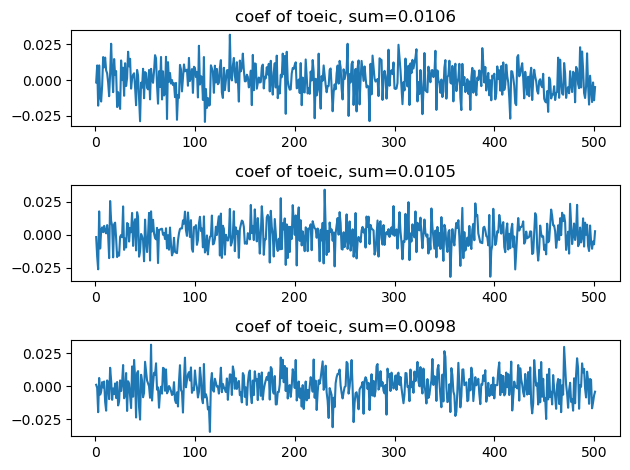

In [25]:
fig, ax = plt.subplots(3)
for i in range(3):
    ## step1 
    df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=i)
    X = df_train.drop(['employment_score'],axis=1)
    y = df_train[['employment_score']]
    XX = df_test.drop(['employment_score'],axis=1)
    yy = df_test[['employment_score']]
    ## step2 
    predictr = sklearn.linear_model.LinearRegression()
    ## step3 
    predictr.fit(X,y)
    ## step4: pass 
    #---# 
    s = pd.Series(predictr.coef_.reshape(-1))
    ax[i].plot(s[1:])
    ax[i].set_title(f'coef of toeic, sum={sum(s[1:]):.4f}')
fig.tight_layout()

`-` 특징

1. 계수값이 매우 불안정하다. (돌릴때마다 다른값이 나옴) 
2. 계수값의 해석이 용이하지 않다. (어떤건 음의 계수값도 가짐, 토익올리면 취업이 오히려 안된다?)
3. 그렇지만 합치면 대충 합리적인 값이 나온다. 